# Introduction to Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It is widely used for prediction and forecasting in various fields such as economics, finance, and science.

## 1. What is Linear Regression?
Linear regression assumes that there is a linear relationship between the independent variable(s) and the dependent variable and that this relationship can be represented by a straight line (or hyperplane). Linear regression aims to find the best-fitting linear equation that describes this relationship. 

### Applications:
- **Predicting Exam Scores:** Imagine you have data on students' study hours and their corresponding exam scores. You can use linear regression to predict a student's exam score based on the number of hours they studied.

- **Forecasting House Prices:** Suppose you have data on house sizes (in square feet) and their selling prices. You can use linear regression to predict the selling price of a house based on its size.

- **Estimating Gas Mileage:** If you have data on cars' engine sizes and their corresponding gas mileage, you can use linear regression to predict a car's gas mileage based on its engine size.

## 2. Theory Behind Linear Regression

Recall the equation for a straight line from your early math classes,

$$ y = mx + b$$

The equation represents a straight line where $m$ is the slope and $b$ is the y-intercept.

Here's a Python code example using matplotlib to plot the line represented by the equation $ y = mx + b$ and allowing you to adjust the values of $m$ and $b$.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox

In [5]:
# Function to plot the line
def plot_line(m, b):
    x_vals = np.linspace(0, 10, 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('y = mx + b')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders for m and b
m_slider = FloatSlider(min=-10, max=10, step=1, value=0, description='Slope (m)')
b_slider = FloatSlider(min=-10, max=10, step=1, value=0, description='Intercept (b)')

# Create interactive plot
interact(plot_line, m=m_slider, b=b_slider)

interactive(children=(FloatSlider(value=0.0, description='Slope (m)', max=10.0, min=-10.0, step=1.0), FloatSli…

<function __main__.plot_line(m, b)>

Now imagine we have data on house sizes (in square feet) and their selling prices. Below, we generate some synthetic data for house sizes and selling prices.

In [6]:
# Generate some random data for house sizes and selling prices
np.random.seed(0)
house_sizes = np.random.randint(1000, 3000, 50)  # House sizes in square feet
prices = 50 * house_sizes + np.random.normal(0, 10000, 50)  # Selling prices

# Create a DataFrame
df = pd.DataFrame({'House Size (sqft)': house_sizes, 'Selling Price': prices})

# Display the DataFrame
df

,House Size (sqft),Selling Price
0,1684,58670.101842
1,1559,84486.185954
2,2653,141294.361989
3,2216,103378.349796
4,1835,114447.546240
5,1763,73606.343254
6,2731,137007.585173
7,2383,117278.161500
8,2033,116977.792144
9,2747,152043.587699


Now let's plot these data points in a scatter plot.

In [7]:
# Function to plot the data and multiple lines with different fits
def plot_data_and_lines(show_lines, show_legend):
    plt.figure(figsize=(10, 6))
    plt.scatter(house_sizes, prices, color='blue', label='Data')

    # Plot multiple lines with different fits
    if show_lines:
        for i in range(-50, 51, 25):  # Generate 5 lines with different fits
            m = i
            b = np.mean(prices) - m * np.mean(house_sizes)  # Calculate intercept
            x_vals = np.linspace(min(house_sizes), max(house_sizes), 100)
            y_vals = m * x_vals + b
            plt.plot(x_vals, y_vals, label=f'y = {m:.2f}x + {b:.2f}')

    # Show legend if specified
    if show_legend:
        plt.legend()

    plt.xlabel('House Size (sqft)')
    plt.ylabel('Selling Price')
    plt.title('House Size vs Selling Price')
    plt.grid(True)
    plt.show()

# Checkbox widget to show/hide the lines
lines_checkbox = Checkbox(value=False, description='Show Lines')  # Default value set to False

# Checkbox widget to show/hide the legend
legend_checkbox = Checkbox(value=False, description='Show Legend')  # Default value set to False

# Function to update the plot when checkboxes are toggled
def update_plot(show_lines, show_legend):
    plot_data_and_lines(show_lines, show_legend)

# Create interactive plot with checkboxes
interact(update_plot, show_lines=lines_checkbox, show_legend=legend_checkbox)

interactive(children=(Checkbox(value=False, description='Show Lines'), Checkbox(value=False, description='Show…

<function __main__.update_plot(show_lines, show_legend)>

Let's imagine 5 data scientists are working with the same dataset. If each scientist draws a different line of fit, how do they decide which line is best?

How can we find a simple linear equation that best represents the relationship between the dependent variable, *price*, and the independent variable, *size*? In other words, how do we find the **line of best fit**?

### Line of Best Fit:
The line of best fit represents the linear relationship between the independent variable (predictor) and the dependent variable (response). In our case, the independent variable is the house size (size) and the dependent variable is the selling price (price). 

This line is often determined through linear regression, which aims to minimize **the difference between the observed values and the values predicted by the line**.

### What are Residuals?
Residuals, denoted as $ε$ (epsilon), are the differences between the observed values ($y$) and the values predicted by the model ($\hat{y}$). In other words, they represent the error in the model's predictions. Mathematically, residuals can be expressed as,

$$ε_{i} = y_{i} - \hat{y}_{i}$$
$$~~~~~~~~~~~~~~~~~~= y_{i} - (mx_{i} + b)$$

where:
- $ε_{i}$ is the error or residual for the $i$ th data point

- $y_{i}$ is the observed (actual) value for the $i$ th data point

- $\hat{y}_{i}$ is the predicted value by the model for the $i$ th data point

- $m$ represents the slope of the line in a linear regression model

- $x_{i}$ represents the value of the independent variable for the $i$ th data point

- $b$ represents the y-intercept of the line in a linear regression model

A residual is a measure of how well a line fits an individual data point. Consider this simple data set with a line of fit drawn through it.

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/residual1.png" alt="Alt text" width="400" height="400">
</p>

and notice how point **(2, 8)** is **<span style="color:green">4</span>** units above the line:

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/residual2.png" alt="Alt text" width="400" height="400">
</p>

This vertical distance is known as a **residual**. For data points above the line, the residual is positive, and for data points below the line, the residual is negative.

For example, the residual for the point **(4, 3)** is **<span style="color:red">-2</span>**.

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/residual3.png" alt="Alt text" width="400" height="400">
</p>

The closer a data point's residual is to 0 the better the fit. In this case, the line fits the point (4, 3) better than (2, 8).

### Visualizing Residuals
We can further explore residuals by visualizing how they relate to our linear regression model for our housing dataset. Here, we can adjust the slope ($m$) and intercept ($b$) of the regression line and observe the corresponding residuals.

In [8]:
# Function to plot the data, line, and residuals
def plot_data_line_residuals(m, b, show_line, show_residuals):
    plt.figure(figsize=(12, 6))
    plt.scatter(house_sizes, prices, color='blue', label='Data')

    # Calculate predicted prices using the selected m and b
    predicted_prices = m * house_sizes + b
    
    # Plot the line if show_line is True
    if show_line:
        plt.plot(house_sizes, predicted_prices, color='red', label=f'y = {m}x + {b}')

    # Plot dashed lines representing residuals if show_residuals is True
    if show_residuals:
        for i in range(len(house_sizes)):
            plt.plot([house_sizes[i], house_sizes[i]], [prices[i], predicted_prices[i]], color='green', linestyle='--', linewidth=0.8)

        # Add legend for residuals if not already added
        handles, labels = plt.gca().get_legend_handles_labels()
        if 'Residuals' not in labels:
            plt.plot([], [], color='green', linestyle='--', label='Residuals')

    plt.xlabel('House Size (sqft)')
    plt.ylabel('Selling Price')
    plt.title('House Size vs Selling Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders for m and b
m_slider = FloatSlider(min=-100, max=100, step=1, value=0, description='Slope (m)')
b_slider = FloatSlider(min=-50000, max=50000, step=1000, value=0, description='Intercept (b)')

# Checkbox widget to show/hide the line
line_checkbox = Checkbox(value=False, description='Show Line')  # Default value set to False

# Checkbox widget to show/hide the residuals
residuals_checkbox = Checkbox(value=False, description='Show Residuals')  # Default value set to False

# Function to update the plot when checkboxes or sliders are adjusted
def update_plot(show_line, show_residuals, m, b):
    plot_data_line_residuals(m, b, show_line, show_residuals)

# Create interactive plot with sliders and checkboxes
interact(update_plot, show_line=line_checkbox, show_residuals=residuals_checkbox, m=m_slider, b=b_slider)


interactive(children=(Checkbox(value=False, description='Show Line'), Checkbox(value=False, description='Show …

<function __main__.update_plot(show_line, show_residuals, m, b)>

So how do we know we've found the model parameters ($m$ and $b$) for the **line of best fit**?

### Determining Model Parameters for the Line of Best Fit
#### Method of Least Squares
In linear regression, the model parameters for the line of best fit are determined using the **method of least squares**. This method aims to <u>minimize</u> the sum of the squared differences between the observed values and the values predicted by the regression line.

#### Mathematical Formulation
Given a set of $n$ data points $(x_{i}, y_{i})$, where $x_{i}$ represents the independent variable and $y_{i}$ represents the corresponding dependent variable, the line of best fit is represented by the equation:

$$ \hat{y}_{i} = mx_{i} + b$$

where:
- $m$ is the slope of the line (coefficient for the independent variable $x$)

- $x_{i}$ represents the value of the independent variable for the $i$-th data point

- $b$ is the y-intercept of the line

The goal is to find the values of $m$ and $b$ that minimize the **sum of the squared errors**, denoted as $SSE$:

$$SSE = \sum_{i=1}^{n}ε_{i}^2 = \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2 = \sum_{i=1}^{n}(y_{i} - (mx_{i} + b))^2$$

where:
- $\hat{y}_{i}$ is the predicted value of $y_{i}$ at the $i$ th data point

With our same housing dataset, we can adjust the slope ($m$) and intercept ($b$) of the regression line and observe the corresponding sum of squared errors.

In [9]:
# Function to plot the data, line, residuals, and SSE
def plot_data_line_residuals_sse(m, b, show_line, show_residuals):
    plt.figure(figsize=(12, 6))
    plt.scatter(house_sizes, prices, color='blue', label='Data')

    # Calculate predicted prices using the selected m and b
    predicted_prices = m * house_sizes + b
    
    # Calculate residuals
    residuals = prices - predicted_prices
    
    # Calculate sum of squared residuals if the line is shown
    if show_line:
        sum_squared_residuals = np.sum(residuals**2)
    else:
        sum_squared_residuals = None
    
    # Plot the line if show_line is True
    if show_line:
        plt.plot(house_sizes, predicted_prices, color='red', label=f'y = {m}x + {b}')

    # Plot dashed lines representing residuals if show_residuals is True
    if show_residuals:
        for i in range(len(house_sizes)):
            plt.plot([house_sizes[i], house_sizes[i]], [prices[i], predicted_prices[i]], color='green', linestyle='--', linewidth=0.8)

        # Add legend for residuals if not already added
        handles, labels = plt.gca().get_legend_handles_labels()
        if 'Residuals' not in labels:
            plt.plot([], [], color='green', linestyle='--', label='Residuals')

    plt.xlabel('House Size (sqft)')
    plt.ylabel('Selling Price')
    title = 'House Size vs Selling Price'
    if show_line:
        title += f'\nSum of Squared Errors: {sum_squared_residuals:.2f}'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders for m and b
m_slider = FloatSlider(min=-100, max=100, step=1, value=0, description='Slope (m)')
b_slider = FloatSlider(min=-50000, max=50000, step=1000, value=0, description='Intercept (b)')

# Checkbox widget to show/hide the line
line_checkbox = Checkbox(value=False, description='Show Line')  # Default value set to False

# Checkbox widget to show/hide the residuals
residuals_checkbox = Checkbox(value=False, description='Show Residuals')  # Default value set to False

# Function to update the plot when checkboxes or sliders are adjusted
def update_plot(show_line, show_residuals, m, b):
    plot_data_line_residuals_sse(m, b, show_line, show_residuals)

# Create interactive plot with sliders and checkboxes
interact(update_plot, show_line=line_checkbox, show_residuals=residuals_checkbox, m=m_slider, b=b_slider)


interactive(children=(Checkbox(value=False, description='Show Line'), Checkbox(value=False, description='Show …

<function __main__.update_plot(show_line, show_residuals, m, b)>

#### Introduction to Cost Function
Now that we've discussed the method of least squares and the goal of minimizing the sum of squared errors ($SSE$) to find the coefficients for the line of best fit, let's delve deeper into the concept of the **cost function**.

In the realm of machine learning and optimization algorithms, a **cost function** serves as a critical component in evaluating the performance of a model. Also known as a loss function or objective function, it quantifies how well the model's predictions align with the actual observed values in the training dataset.

##### Purpose of Cost Function
The primary purpose of a cost function is twofold:

1. **Evaluation of Model Performance**: By assessing the extent of error or deviation between the predicted and actual values, the cost function provides insights into the efficacy of the model in capturing the underlying patterns and relationships within the data. A lower cost indicates better alignment between predictions and observations, signifying higher model accuracy.

2. **Optimization**: Beyond evaluation, the cost function plays a pivotal role in the optimization process, guiding the iterative adjustment of model parameters to minimize prediction errors. Optimization algorithms, such as gradient descent, leverage the gradient (partial derivatives) of the cost function with respect to the model parameters to iteratively update the parameters and converge towards the optimal solution. More on this later...

#### Cost Function: Sum of Squared Errors ($SSE$)
As we've seen earlier, the sum of squared errors ($SSE$) serves as a measure of the discrepancy between the observed values and the values predicted by our regression line. While $SSE$ is effective in quantifying the overall error, it has some limitations.

#### Limitations of $SSE$
Although $SSE$ provides valuable insight into the model's performance, it does not account for the number of data points in the dataset. As a result, $SSE$ may vary significantly depending on the size of the dataset, making it challenging to compare models trained on different datasets directly.

#### Introducing Mean Squared Error ($MSE$)
To address the limitations of $SSE$, we introduce the concept of **Mean Squared Error** ($MSE$). $MSE$ is obtained by dividing the $SSE$ by the number of data points, resulting in the average squared error per data point. Mathematically, it is written as:

$$ MSE = \frac{1}{n}SSE = \frac{1}{n}\sum_{i=1}^{n}ε_{i}^2 = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2 = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - (mx_{i} + b))^2$$

This normalization ensures that the cost function is independent of the dataset size, ensuring that the loss function is consistent across datasets of varying sizes. Additionally, $MSE$ provides a more intuitive measure of the model's performance, representing the average squared difference between the predicted and actual values.

With our same housing dataset, we can adjust the slope ($m$) and intercept ($b$) of the regression line and observe the corresponding mean squared error ($MSE$).

In [10]:
# Function to plot the data, line, residuals, and MSE
def plot_data_line_residuals_mse(m, b, show_line, show_residuals):
    plt.figure(figsize=(12, 6))
    plt.scatter(house_sizes, prices, color='blue', label='Data')

    # Calculate predicted prices using the selected m and b
    predicted_prices = m * house_sizes + b
    
    # Calculate residuals
    residuals = prices - predicted_prices
    n = len(residuals)
    
    # Calculate mean sequared error if the line is shown
    if show_line:
        mean_squared_error = (1/n)*np.sum(residuals**2)
    else:
        mean_squared_error = None
    
    # Plot the line if show_line is True
    if show_line:
        plt.plot(house_sizes, predicted_prices, color='red', label=f'y = {m}x + {b}')

    # Plot dashed lines representing residuals if show_residuals is True
    if show_residuals:
        for i in range(len(house_sizes)):
            plt.plot([house_sizes[i], house_sizes[i]], [prices[i], predicted_prices[i]], color='green', linestyle='--', linewidth=0.8)

        # Add legend for residuals if not already added
        handles, labels = plt.gca().get_legend_handles_labels()
        if 'Residuals' not in labels:
            plt.plot([], [], color='green', linestyle='--', label='Residuals')

    plt.xlabel('House Size (sqft)')
    plt.ylabel('Selling Price')
    title = 'House Size vs Selling Price'
    if show_line:
        title += f'\nMean Squared Error: {mean_squared_error:.2f}'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders for m and b
m_slider = FloatSlider(min=-100, max=100, step=1, value=0, description='Slope (m)')
b_slider = FloatSlider(min=-50000, max=50000, step=1000, value=0, description='Intercept (b)')

# Checkbox widget to show/hide the line
line_checkbox = Checkbox(value=False, description='Show Line')  # Default value set to False

# Checkbox widget to show/hide the residuals
residuals_checkbox = Checkbox(value=False, description='Show Residuals')  # Default value set to False

# Function to update the plot when checkboxes or sliders are adjusted
def update_plot(show_line, show_residuals, m, b):
    plot_data_line_residuals_mse(m, b, show_line, show_residuals)

# Create interactive plot with sliders and checkboxes
interact(update_plot, show_line=line_checkbox, show_residuals=residuals_checkbox, m=m_slider, b=b_slider)

interactive(children=(Checkbox(value=False, description='Show Line'), Checkbox(value=False, description='Show …

<function __main__.update_plot(show_line, show_residuals, m, b)>

#### Gradient Descent
Now that we've established $MSE$ as our preferred cost function, let's explore how we can optimize our linear regression model using **gradient descent**. Gradient descent is an iterative optimization algorithm that aims to <u>minimize</u> the cost function ($MSE$) by adjusting the model parameters (slope and intercept).

##### Mathematics Behind Gradient Descent 
Up to this point, we've been using $\hat{y}_{i}$ to represent the predicted value for the $i$-th training example,

$$ \hat{y}_{i} = mx_{i} + b$$

where:
- $\hat{y}_{i}$ is the predicted value for the $i$-th data point

- $m$ is the slope of the line (coefficient for the independent variable $x$)

- $x_{i}$ represents the value of the independent variable for the $i$-th data point

- $b$ is the y-intercept of the line

We can also express the linear regression with the following notation,

$$h_{\theta}(x_{i}) = \theta_{0} + \theta_{1}x_{i}$$

where:

- $h_{\theta}(x_{i})$ is the predicted value for the $i$-th data point

- $\theta_{0}$ corresponds to the y-intercept ($b$)

- $\theta_{1}$ corresponds to the slope ($m$)

- $x_{i}$ represents the value of the independent variable for the $i$-th data point

To minimize the cost function ($MSE$), the model needs to find the best value of $\theta_{0}$ and $\theta_{1}$. We will find the optimal values for $\theta_{0}$ and $\theta_{1}$ using gradient descent in a step-by-step process.

##### Step-by-Step Process of Gradient Descent
1. **Initialization**: We initialize the values of $\theta_{0}$ and $\theta_{1}$ to some random values or zeros. These values represent the parameters (slope and intercept) of the linear regression model.

2. **Define the Cost Function:** We define the Mean Squared Error ($MSE$) as our cost function. The $MSE$ represents the average squared difference between the predicted and actual values over all data points. We can rewrite our cost function in terms of $h_{\theta}(x_{i})$,

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2 = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - h_{\theta}(x_{i}))^2$$

We can actually scale our cost function using a factor of $\frac{1}{2n}$ so that we get a cost function the looks like,

$$ J(\theta) = \frac{1}{2n}\sum_{i=1}^{n}(h_{\theta}(x_{i}) - y_{i})^2$$

The factor $\frac{1}{2}$ is often included for mathematical convenience as it simplifies the derivative computation in the next step. The additional $\frac{1}{n}$ factor adjusts the scaling based on the number of training examples, making the cost function more consistent across datasets of different sizes. 

The subtraction $h_{\theta}(x_{i}) - y_{i}$ is just a rearrangement; it serves the same purpose of quantifying the discrepancy between predicted and actual values, ultimately resulting in the same optimization goal of minimizing the cost function. For example, $(3 - 1)^2 = 2^2 = 4$ which is the same as  $(1 - 3)^2 = (-2)^2 = 4$

3. **Compute the Gradient:** Compute the gradient of the cost function with respect to each parameter. It involves making partial differentiation of cost function with respect to the parameters.

Partial derivative with respect to $\theta_0$ simplifies to,

$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{n}\sum_{i=1}^{n}(h_{\theta}(x_{i}) - y_{i})$$ 

Partial derivative with respect to $\theta_1$ simplifies to,

$$\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{n}\sum_{i=1}^{n}(h_{\theta}(x_{i}) - y_{i}) \cdot x_{i}$$ 

4. **Set the Learning Rate:** We choose a learning rate, denoted as $\alpha$, which determines the size of the steps we take in the direction of the gradient.

5. **Update the Parameters:** Using the gradient and the learning rate, we update the parameters iteratively. The update rule for each parameter is:

$$\theta_{0} = \theta_{0} - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_0}$$

$$\theta_{1} = \theta_{1} - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_1}$$

The generalized update rule for each model parameter is

**<center>new_coefficient = old_coefficient - (learning_rate * gradient)</center>**

We apply this update rule to each coefficient, moving them in the direction that reduces the cost function.

6. **Repeat Until Convergence:** We repeat steps 3 through 5 until the cost function converges to a minimum. Convergence is typically checked by monitoring the change in the cost function or after a predetermined number of iterations.

7. **Final Parameters:** Once the algorithm converges, the final parameters $\theta_0$ and $\theta_1$ represent the best-fit line for our linear regression model.

Lets try to visualize this process by plotting our cost function ($MSE$) against one of our model parameter's, specifically $\theta_1$ which represents slope of our linear regression. $\theta_1$ also represents the weight or coefficient of the parameter *price*.

In [11]:
# Define the cost function
def cost_function(theta0, theta1, x, y):
    predictions = theta0 + theta1 * x
    errors = predictions - y
    n = len(x)
    cost = (1 / (2 * n)) * np.sum(errors ** 2)
    return cost

# Derivative of the cost function with respect to theta1 (slope)
def theta1_partial_derivative(theta0, theta1, x, y):
    predictions = theta0 + theta1 * x
    errors = predictions - y
    n = len(x)
    derivative = (1 / n) * np.sum(errors * x) 
    return derivative

# Interactive function to plot the cost function against a specified weight
def plot_cost_function(weight_value, show_tangent_line):
    # Create a range of weight values for plotting
    weights = np.linspace(-1000, 1000, 100)
    
    # Calculate the cost for each weight value
    costs = [cost_function(0, w, house_sizes, prices) for w in weights]
    
    # Plot the cost function
    plt.figure(figsize=(10, 6))
    plt.plot(weights, costs, label='Cost Function')
    
    # Plot the specified weight value as a green point
    plt.plot(weight_value, cost_function(0, weight_value, house_sizes, prices), 'o', markersize=8, color='black')
    
    if show_tangent_line:
        # Calculate the slope of the tangent line (derivative of the cost function)
        slope = theta1_partial_derivative(0, weight_value, house_sizes, prices)
        
        # Plot the tangent line
        tangent_x = np.linspace(weight_value - 300, weight_value + 300, 100)
        tangent_y = slope * (tangent_x - weight_value) + cost_function(0, weight_value, house_sizes, prices)
        plt.plot(tangent_x, tangent_y, 'r--', label='Tangent Line')
    
    plt.xlabel('$\\theta_1$')
    plt.ylabel('MSE')
    plt.title('Cost Function (MSE) vs $\\theta_1$')
    plt.grid(True)
    plt.legend()
    plt.show()

# Define sliders for weight value and tangent line visibility
weight_slider = FloatSlider(min=-1000, max=1000, step=10, value=-700, description='theta1')
tangent_line_checkbox = Checkbox(value=False, description='Show Tangent Line')

# Create interactive plot
interact(plot_cost_function, weight_value=weight_slider, show_tangent_line=tangent_line_checkbox)

interactive(children=(FloatSlider(value=-700.0, description='theta1', max=1000.0, min=-1000.0, step=10.0), Che…

<function __main__.plot_cost_function(weight_value, show_tangent_line)>

In the plot above, The cost function quantifies how well our model fits the training data for different values of $\theta_1$.

Now, let's focus on a specific point on the cost function curve. At that point, the tangent line touches the curve, indicating the slope of the curve at that precise location. The gradient of the cost function at this point gives us the slope of this tangent line. 

This gradient essentially tells us how the cost function will change and in what direction if we adjust $\theta_1$ slightly.

**If the slope of the tangent line is +positive**: $~~\theta_j = \theta_j - \alpha~\cdot~$ (+ve value). Hence the value of $\theta_j$ decreases.

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/gradient_descent1.png" alt="Alt text" width="400" height="400">
</p>

**If the slope of the tangent line is -negative**: $~~\theta_j = \theta_j - \alpha~\cdot~$ (-ve value). Hence the value of $\theta_j$ increases.

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/gradient_descent2.png" alt="Alt text" width="400" height="400">
</p>

Again, let's wvisualize the cost function ($MSE$) against the parameter $\theta_1$ which represents the slope of the regression line. As a reminder, the goal of gradient descent is to find the optimal value of $\theta_1$ that minimizes the cost function.

In [12]:
# Global variables for initial parameters and optimization
theta0 = 0
alpha = 0.0000001 
num_iterations = 20

# Define the cost function
def cost_function(theta0, theta1, x, y):
    predictions = theta0 + theta1 * x
    errors = predictions - y
    n = len(x)
    cost = (1 / (2 * n)) * np.sum(errors ** 2)
    return cost

# Compute the gradient of the cost function
def compute_gradient(theta0, theta1, x, y):
    predictions = theta0 + theta1 * x
    errors = predictions - y
    n = len(x)
    gradient_theta0 = (1 / n) * np.sum(errors)
    gradient_theta1 = (1 / n) * np.sum(errors * x)
    return gradient_theta0, gradient_theta1

# Interactive function to plot the cost function and the steps to the minimum
def plot_steps(theta1, show_steps):
    global theta0
    global alpha

    # Create a range of weight values for plotting
    weights = np.linspace(-1000, 1000, 100)
    
    # Calculate the cost for each weight value
    costs = [cost_function(0, w, house_sizes, prices) for w in weights]
    
    # Plot the cost function
    plt.figure(figsize=(10, 6))
    plt.plot(weights, costs, label='Cost Function')
    
    # Plot the starting point
    cost = cost_function(theta0, theta1, house_sizes, prices)
    plt.plot(theta1, cost, 'o', markersize=8, color="black")
    # print(f"Iteration 0: Theta0 = {theta0}, Theta1 = {theta1}, Cost = {cost}, Alpha: {alpha}")

    if show_steps:
        if theta1 >= 52.74:
            rad = -0.3
        else:
            rad = 0.3

        # Perform gradient descent
        for i in range(num_iterations):
            # Compute the gradient
            gradient_theta0, gradient_theta1 = compute_gradient(theta0, theta1, house_sizes, prices)
            
            # Update the parameters
            prev_theta0, prev_theta1 = theta0, theta1
            theta0 -= alpha * gradient_theta0
            theta1 -= alpha * gradient_theta1
            
            # Compute the cost
            cost = cost_function(theta0, theta1, house_sizes, prices)
            
            # Display the updated parameters and cost
            plt.plot(theta1, cost, 'o', markersize=8, color="black")
            
            # Add arrow indicating the direction of movement
            plt.annotate('', xy=(theta1, cost), xytext=(prev_theta1, cost_function(prev_theta0, prev_theta1, house_sizes, prices)),
                         arrowprops=dict(arrowstyle='->', connectionstyle=f'arc3,rad={rad}', lw=1.5, color="red"))
            # print(f"Iteration {i + 1}: Theta0 = {theta0}, Theta1 = {theta1}, Cost = {cost}, Alpha: {alpha}")
        
    
    plt.xlabel('$\\theta_1$')
    plt.ylabel('MSE')
    plt.title('Cost Function (MSE) vs $\\theta_1$')
    plt.grid(True)
    plt.legend()
    plt.show()


# Define sliders for initial weight and learning rate, and a checkbox for showing steps/path
theta1_slider = FloatSlider(min=-1000, max=1000, step=10, value=-700, description='Theta_1')
steps_checkbox = Checkbox(value=False, description='Show Steps')

# Create interactive plot
interact(plot_steps, theta1=theta1_slider, show_steps=steps_checkbox)

interactive(children=(FloatSlider(value=-700.0, description='Theta_1', max=1000.0, min=-1000.0, step=10.0), Ch…

<function __main__.plot_steps(theta1, show_steps)>

In the plot above, we can set the initial point which corresponds to to the initial chosen value of $theta_1$. 

If the "Show Steps" checkbox is selected, the red arrows illustrate the iterative steps taken by the gradient descent algorithm to minimize the cost function. At each step, the algorithm computes the gradient of the cost function with respect to $theta_1$ and updates $theta_1$ (and $theta_0$) accordingly. These updates happen iteratively until the cost function converges to a minimum or after a set number of iterations.

#### How To Choose Learning Rate 
The choice of correct learning rate is very important as it ensures that Gradient Descent converges in a reasonable time.

If we choose **$\alpha$ to be very large**, Gradient Descent can overshoot the minimum. It may fail to converge or even diverge.

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/alpha1.png" alt="Alt text" width="300" height="300">
</p>

If we choose **$\alpha$ to be very small**, Gradient Descent will take small steps to reach local minima and will take a longer time to reach minima. 

<p align="center">
  <img src="/workspaces/themarisolhernandez-4geeks-ds-lessons/imgs/alpha2.png" alt="Alt text" width="300" height="300">
</p>

### Linear Regression with `scikit-learn `
While implementing gradient descent from scratch offers deep insights into optimization techniques, we can leverage existing libraries like `scikit-learn` to streamline the process. `scikit-learn`  encapsulates complex optimization algorithms, such as gradient descent variants, within its user-friendly interface, allowing us to focus on model development rather than algorithmic intricacies.

Here, we instantiate a Linear Regression model object and then train it using the fit method with our dataset. Behind the scenes, `scikit-learn` employs efficient optimization algorithms, including variants of gradient descent, to find the optimal parameters that minimize the difference between predicted and actual target values.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['House Size (sqft)']], df['Selling Price'])

LinearRegression()

### Interpreting the Final Model Parameters
Having trained our Linear Regression model using `scikit-learn`, we've successfully optimized its parameters to best fit the data. Let's examine the final model parameters:

In [14]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -8007.736270308422
Coefficients: [52.74617465]


With these values, we can write the equation of our final regression model,

$$h_{\theta}(x_{i}) = \theta_{0} + \theta_{1}x_{i} = -8007.74 + 52.75x_{i}$$

where:

- $x_{i}$ represents the house size (sqft) for the $i$ th data point

The **intercept** represents the model's prediction when all features are zero. It accounts for the baseline value of the target variable, independent of the input features.

On the other hand, the **coefficients** (also known as weights or slopes) quantify the impact of each feature on the target variable. The coefficient represents the change in the target variable for a one-unit change in the input feature, while holding all other features constant.

For example, we can say that we expect the price to increase by $52.75 for every additional square foot of house size, with all other factors held constant.

Let's plot our final regression model:

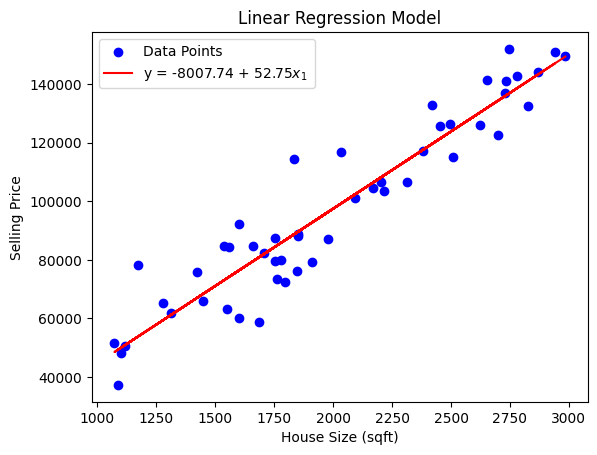

In [15]:
x = df['House Size (sqft)']
y = df['Selling Price']

theta0 = model.intercept_
theta1 = model.coef_[0]

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(x, theta0 + theta1*x, color='red', label=f'y = {round(theta0, 2)} + {round(theta1, 2)}$x_1$ ')

# Adding labels and title
plt.xlabel('House Size (sqft)')
plt.ylabel('Selling Price')
plt.title('Linear Regression Model')
plt.legend()

# Displaying the plot
plt.show()

### Model Performance Metrics
After building a regression model, it's crucial to assess its performance using appropriate metrics. These metrics help quantify how well the model fits the data and how accurate its predictions are.

#### Mean Absolute Error (MAE)

Mean Absolute Error (MAE) measures the average absolute difference between the predicted values and the actual values. It provides a straightforward interpretation of the model's predictive accuracy.

Mathematically, MAE is calculated as:

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

where:
- $ n $ is the number of samples
- $ y_i $ is the actual target value for the $ i $-th sample
- $ \hat{y}_i $ is the predicted target value for the $ i $-th sample

#### Mean Squared Error (MSE)

Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values. It penalizes larger errors more heavily than smaller ones.

Mathematically, MSE is calculated as:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

#### Root Mean Squared Error (RMSE)

Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error. It is often preferred over MSE because it is in the same units as the target variable, making it more interpretable.

Mathematically, RMSE is calculated as:

$$ RMSE = \sqrt{MSE} $$

#### R-squared ($ R^2 $) Score

R-squared ($ R^2 $) score, also known as the coefficient of determination, measures the proportion of the variance in the target variable that is predictable from the independent variables. It provides an indication of the goodness of fit of the model.

The $ R^2 $ score ranges from 0 to 1, where:
- 0 indicates that the model does not explain any variability in the target variable
- 1 indicates that the model perfectly explains the variability in the target variable

The $ R^2 $ score is calculated as:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

where:
- $ \bar{y} $ is the mean of the actual target values

When interpreting the $ R^2 $ score, it's essential to compare it with the $ R^2 $ score of a baseline model (e.g., a model that always predicts the mean of the target variable). A higher $ R^2 $ score indicates that the model performs better than the baseline model.

#### Implementing Model Performance Metrics with scikit-learn

To calculate these performance metrics using scikit-learn, we can use the appropriate functions provided by the `metrics` module. For example:

In [16]:
from sklearn import metrics

# Make predictions
predictions = model.predict(df[['House Size (sqft)']])

# Calculate MAE
mae = metrics.mean_absolute_error(df['Selling Price'], predictions)

# Calculate MSE
mse = metrics.mean_squared_error(df['Selling Price'], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared score
r_squared = metrics.r2_score(df['Selling Price'], predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R^2): {r_squared}")

Mean Absolute Error (MAE): 7675.090104732525
Mean Squared Error (MSE): 101180451.03180747
Root Mean Squared Error (RMSE): 10058.849389060731
R-squared Score (R^2): 0.8938355372454918
